## Ebauche pour visualiser et travailler la donnée

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Charger les données
df = pd.read_csv("atp_matches_2023.csv")


In [22]:
# Afficher les premières lignes
display(df.head())

print(df.columns)



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


In [25]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values[missing_values > 0])

# Sélection des colonnes pertinentes
cols = ['tourney_date', 'surface', 'winner_id', 'loser_id', 'w_ace', 'l_ace', 'winner_rank', 'loser_rank','tourney_name','winner_ht','loser_ht','winner_hand','loser_hand']
data = df[cols]

# Convertir tourney_date en format datetime
data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')

# Remplacer les valeurs manquantes des classements par une valeur élevée (non classé)
data['winner_rank'].fillna(999, inplace=True)
data['loser_rank'].fillna(999, inplace=True)


Valeurs manquantes par colonne :
 surface                 53
winner_seed           1736
winner_entry          2513
winner_ht               17
loser_seed            2217
loser_entry           2291
loser_ht                32
loser_age                2
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced              171
l_ace                  171
l_df                   171
l_svpt                 171
l_1stIn                171
l_1stWon               171
l_2ndWon               171
l_SvGms                171
l_bpSaved              171
l_bpFaced              171
winner_rank             22
winner_rank_points      22
loser_rank              31
loser_rank_points       31
dtype: int64


/Users/mathiasbuee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/mathiasbuee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           winner_id       loser_id        w_ace        l_ace  winner_rank  \
count    2986.000000    2986.000000  2815.000000  2815.000000  2986.000000   
mean   145036.088078  144006.518084     6.956306     5.415631    81.769926   
std     42766.699797   42450.867025     5.033210     4.906435   140.111036   
min    100644.000000  100644.000000     0.000000     0.000000     1.000000   
25%    106331.000000  106233.000000     3.000000     2.000000    17.000000   
50%    126205.000000  126205.000000     6.000000     4.000000    48.000000   
75%    200325.000000  200318.000000     9.000000     8.000000    88.000000   
max    212051.000000  212044.000000    42.000000    48.000000  1594.000000   

        loser_rank    winner_ht     loser_ht  
count  2986.000000  2969.000000  2954.000000  
mean    123.291695   187.552375   186.631686  
std     201.895494     6.912431     6.621530  
min       1.000000    71.000000   170.000000  
25%      36.000000   183.000000   183.000000  
50%      68.000

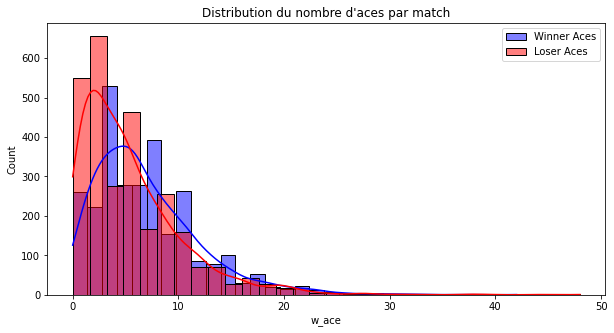

In [26]:
# Créer des statistiques descriptives
print(data.describe())

# Visualisation de la distribution des aces
plt.figure(figsize=(10,5))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.show()

# Sauvegarde des données nettoyées pour la modélisation
data.to_csv("processed_tennis_data.csv", index=False)


In [27]:
# Nombre de matchs récents à prendre en compte
last_n_matches = 10

# Fonction pour calculer les stats des joeurus sur les derniers matchs
def compute_recent_stats(player_id, matches, col_prefix):
    recent_matches = matches[matches['player_id'] == player_id].sort_values(by='tourney_date', ascending=False).head(last_n_matches)
    return {
        f'avg_aces_{col_prefix}': recent_matches['aces'].mean() if not recent_matches.empty else 0,
        f'std_aces_{col_prefix}': recent_matches['aces'].std() if not recent_matches.empty else 0,
        f'avg_rank_{col_prefix}': recent_matches['rank'].mean() if not recent_matches.empty else 999
    }



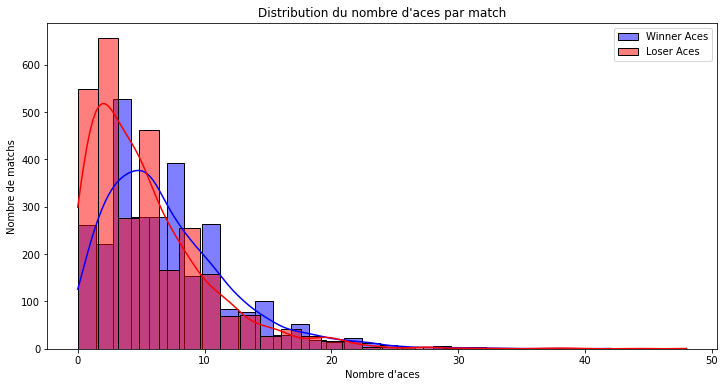

In [28]:
# Visualisation de la distribution des aces
plt.figure(figsize=(12,6))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.xlabel("Nombre d'aces")
plt.ylabel("Nombre de matchs")
plt.show()




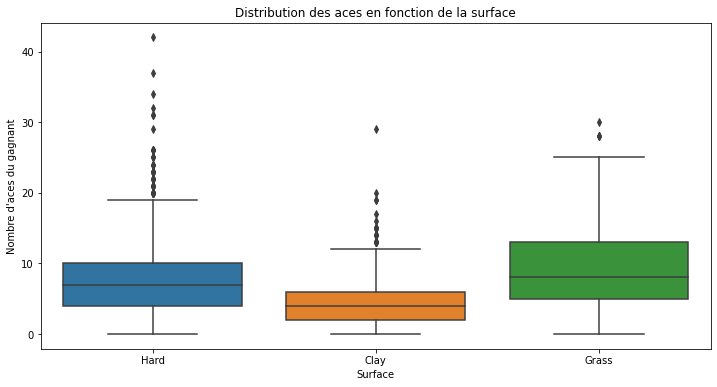

In [29]:
# Distribution des aces par surface
plt.figure(figsize=(12,6))
sns.boxplot(x='surface', y='w_ace', data=data)
plt.title("Distribution des aces en fonction de la surface")
plt.xlabel("Surface")
plt.ylabel("Nombre d'aces du gagnant")
plt.show()



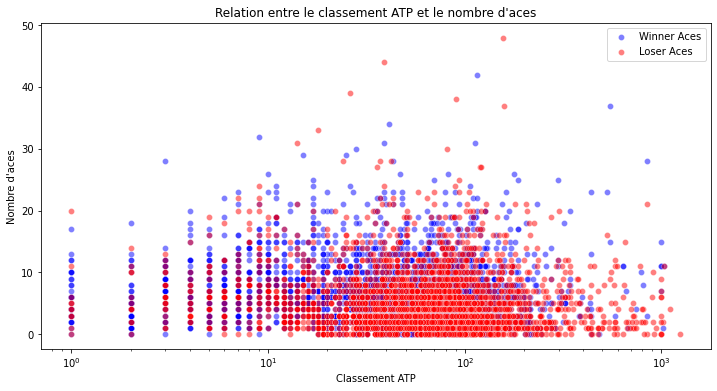

In [30]:
# Impact du classement ATP sur les aces
plt.figure(figsize=(12,6))
sns.scatterplot(x='winner_rank', y='w_ace', data=data, alpha=0.5, color='blue', label='Winner Aces')
sns.scatterplot(x='loser_rank', y='l_ace', data=data, alpha=0.5, color='red', label='Loser Aces')
plt.xscale("log")
plt.xlabel("Classement ATP")
plt.ylabel("Nombre d'aces")
plt.title("Relation entre le classement ATP et le nombre d'aces")
plt.legend()
plt.show()


/Users/mathiasbuee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


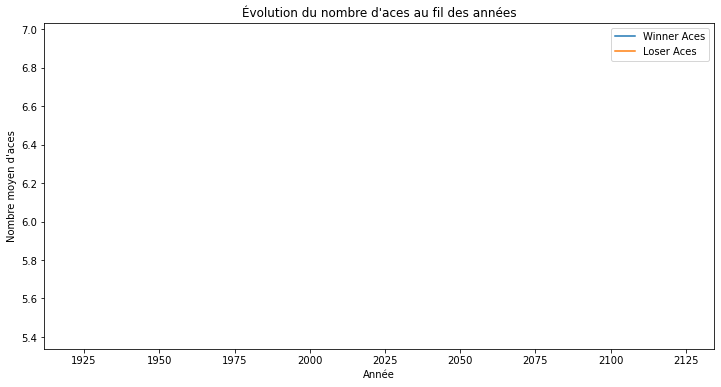

In [31]:

# Tendance des aces en fonction du temps
data['year'] = data['tourney_date'].dt.year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='w_ace', data=data, ci=None, label='Winner Aces')
sns.lineplot(x='year', y='l_ace', data=data, ci=None, label='Loser Aces')
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'aces")
plt.title("Évolution du nombre d'aces au fil des années")
plt.legend()
plt.show()



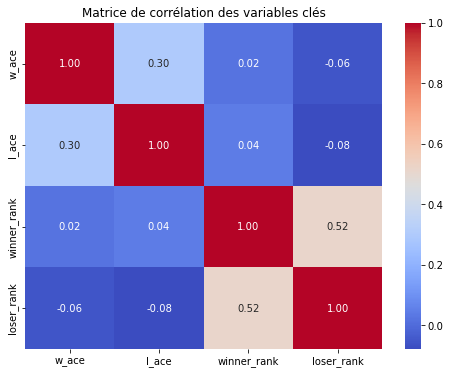

In [19]:
# Corrélations entre classement et nb aces
correlation_matrix = data[['w_ace', 'l_ace', 'winner_rank', 'loser_rank']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés")
plt.show()

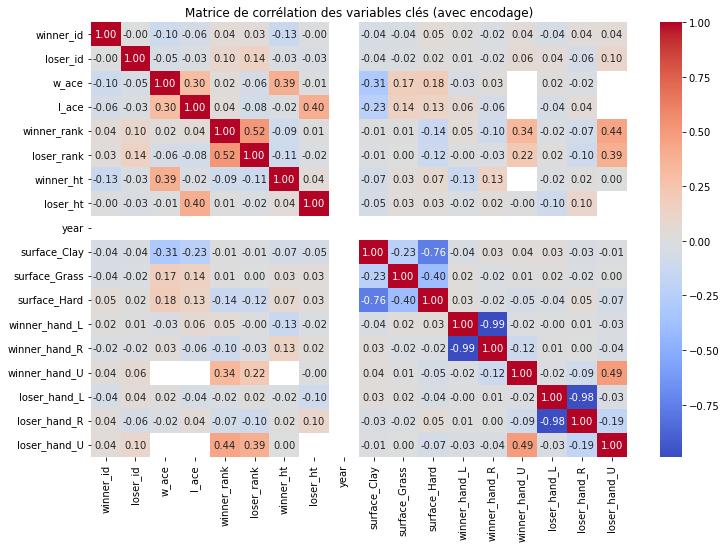

In [38]:
# Encoder les variables catégorielles en one-hot
data_encoded = pd.get_dummies(data, columns=['surface', 'winner_hand', 'loser_hand'])

# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés (avec encodage)")
plt.show()



Liste des colonnes : 

'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object'

In [11]:
# Création d'un dataframe pour stocker les statistiques récentes
player_stats = []
for player_id in pd.concat([data['winner_id'], data['loser_id']]).unique():
    winner_matches = data[data['winner_id'] == player_id][['tourney_date', 'w_ace', 'winner_rank']]
    winner_matches = winner_matches.rename(columns={'w_ace': 'aces', 'winner_rank': 'rank'})
    loser_matches = data[data['loser_id'] == player_id][['tourney_date', 'l_ace', 'loser_rank']]
    loser_matches = loser_matches.rename(columns={'l_ace': 'aces', 'loser_rank': 'rank'})
    
    all_matches = pd.concat([winner_matches, loser_matches])
    stats = compute_recent_stats(player_id, all_matches, 'recent')
    stats['player_id'] = player_id
    player_stats.append(stats)

player_stats_df = pd.DataFrame(player_stats)

# Fusionner avec les données principales
data = data.merge(player_stats_df, left_on='winner_id', right_on='player_id', how='left')
data = data.merge(player_stats_df, left_on='loser_id', right_on='player_id', how='left', suffixes=('_winner', '_loser'))
data.drop(columns=['player_id_winner', 'player_id_loser'], inplace=True)

# Création de la variable cible Over/Under sur la médiane des aces
threshold = data[['w_ace', 'l_ace']].median().mean()
data['over_under'] = (data['w_ace'] + data['l_ace'] > threshold).astype(int)


KeyError: 'player_id'